<a href="https://colab.research.google.com/github/saran-23/interntask-sparkfoundation-/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Task-1 Prediction using Supervised Machine Learning Algorithm***


**Intention:-** To Predict the percentage of an student based on the no. of study hours.



# **Author: *Saran* D**

# **linear regression:**
In general linear regression algorithm which tells the relationship between two variables. From this task we are going to predict the scores of the student based on the number of hours they study.Assume that the response variable is hours of study and the predictor variable is score.

In [41]:
#importing the required libraries
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from scipy import stats

In [42]:
# importing the Dataset
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Dataset has been imported!!!")

Dataset has been imported!!!


In [43]:
#Viewing the first 5 lines
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [44]:
#Viewing the last 5 lines
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [46]:
#showing the labels for Dataframe
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [47]:
#number of rows(25) and number of columns(2) in the DataFrame
data.shape

(25, 2)

In [48]:
#printing information about the Dataframe 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [49]:
#Computing some statistical data for Datafram     
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


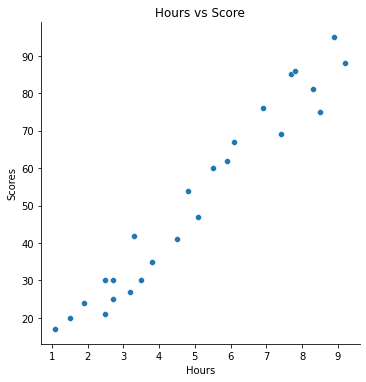

In [50]:
#Visualizing the data
sns.relplot(x='Hours', y='Scores',data=data) 
plt.title("Hours vs Score") 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


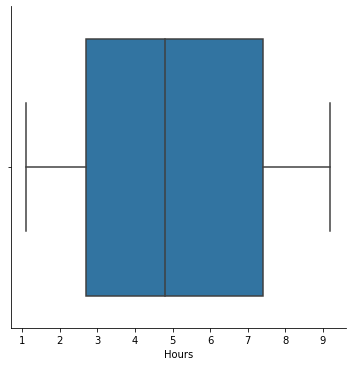

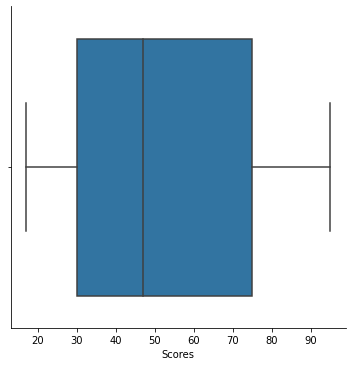

In [51]:
sns.catplot("Hours",data=data,kind='box')
sns.catplot("Scores",data=data,kind='box')

In [52]:
# correlation of all columns in the dataframe
cor=data.corr()
cor

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


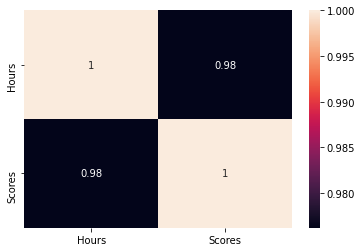

There is a postive relationship between Hours and Scores


In [53]:
#Seaborn Correlation Heatmap 
sns.heatmap(cor,annot=True)
plt.show()
print('There is a postive relationship between Hours and Scores')

From the below the Score distributed normally


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


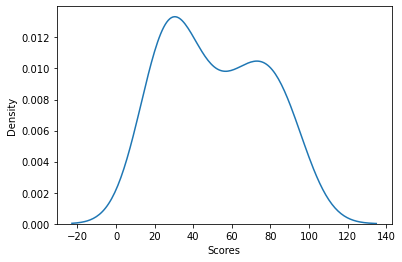

In [54]:
#Representing distribution of data(Scores)
sns.distplot(data['Scores'],hist=False)
print("From the below the Score distributed normally") 

In [59]:
#preparing the data
x= data.iloc[:, :-1].values
y=data.iloc[:, 1].values

In [60]:
#Training data
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)
regressor = LinearRegression()

In [61]:
regressor.fit(x_train.reshape(-1,1),y_train)
print(f"The size of the train data and test data is {x_train.size,y_train.size,x_test.size,y_test.size}")
print("Training completed")

The size of the train data and test data is (20, 20, 5, 5)
Training completed


In [62]:
reg=LinearRegression()
model=reg.fit(x_train,y_train)
print(model.coef_), print(model.intercept_)

[9.91065648]
2.018160041434662


(None, None)

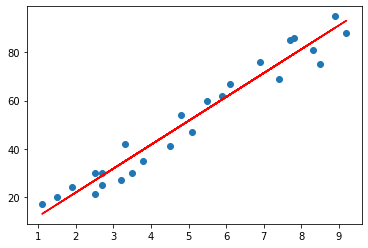

In [65]:
#The best fit of the line is Score = 2.018+9.912*hours

# Plotting the regression line
line=regressor.coef_*x+regressor.intercept_
#plotting for the test data
plt.scatter(x,y)
plt.plot(x,line,color='red');
plt.show()

## Prediction

In [32]:
#Testing data
print(x_test)
#predicton of the model
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [33]:
#Comparing actual Vs predicted value
df =pd.DataFrame({'Actual': y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [34]:
#Estimating training and test score 
print("Training score:", regressor.score(x_train,y_train))
print("Test score:", regressor.score(x_test,y_test))

Training score: 0.9515510725211553
Test score: 0.9454906892105354


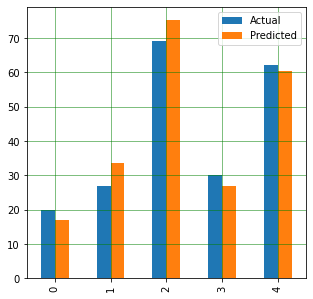

In [35]:
#Plotting the bar graph to depict the difference between the actual and predicted value
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major',linewidth='0.5',color='green')
plt.grid(which='minor',linewidth='0.5',color='black')
plt.show()

In [40]:
Hours=9.25
predict_Score=model.predict([[Hours]])
predict_Score
print('Number of Hours= 9.25')
print("predict Score=",format(predict_Score[0]))

Number of Hours= 9.25
predict Score= 93.69173248737539


The value of root mean squared error is **4.647** which is less than 10% of the mean of percentage of all the studnets (**51.48**)

 R-Squared = 0.9454 means the model explain **94.54%** of the variability in the dependent variable(Score) by independent variable(Hours)

